In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [10]:
import tensorflow as tf

# Load the dataset

In [11]:
crop_df = pd.read_csv('Crop_production.csv')

In [12]:
crop_df.head()

,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615


In [13]:
crop_df.shape

(99849, 13)

In [14]:
from scipy.stats import zscore

# Calculate Z-scores for each numerical feature
z_scores = crop_df[['N', 'P', 'K', 'pH', 'rainfall', 'temperature', 'Area_in_hectares', 'Production_in_tons', 'Yield_ton_per_hec']].apply(zscore)

# Identify outliers
outliers = z_scores[(z_scores > 3) | (z_scores < -3)]
print(outliers)

# Drop outliers (optional)
crop_df = crop_df[(z_scores < 3).all(axis=1)]
print(crop_df)

        N   P   K  pH  rainfall  temperature  Area_in_hectares  \
0     NaN NaN NaN NaN       NaN          NaN               NaN   
1     NaN NaN NaN NaN       NaN          NaN               NaN   
2     NaN NaN NaN NaN       NaN          NaN               NaN   
3     NaN NaN NaN NaN       NaN          NaN               NaN   
4     NaN NaN NaN NaN       NaN          NaN               NaN   
...    ..  ..  ..  ..       ...          ...               ...   
99844 NaN NaN NaN NaN       NaN          NaN               NaN   
99845 NaN NaN NaN NaN       NaN          NaN               NaN   
99846 NaN NaN NaN NaN       NaN          NaN               NaN   
99847 NaN NaN NaN NaN       NaN          NaN           3.12355   
99848 NaN NaN NaN NaN       NaN          NaN               NaN   

       Production_in_tons  Yield_ton_per_hec  
0                     NaN                NaN  
1                     NaN                NaN  
2                     NaN                NaN  
3                  

In [15]:
crop_df

,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99843,99843,west bengal,rabi,rapeseed,50,40,20,5.12,152.54,22.280000,886.0,542.0,0.611738
99844,99844,west bengal,rabi,wheat,60,30,30,6.70,152.54,22.280000,2013.0,5152.0,2.559364
99845,99845,west bengal,summer,maize,80,40,20,5.68,182.50,29.200000,258.0,391.0,1.515504
99846,99846,west bengal,summer,rice,80,40,40,5.64,182.50,29.200000,105.0,281.0,2.676190


# Preprocessing
#### Drop "Unnamed: 0" column

In [16]:
crop_df.drop('Unnamed: 0',axis=1,inplace=True)

In [17]:
crop_df.describe()

,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
count,93201.000000,93201.000000,93201.000000,93201.000000,93201.000000,93201.000000,93201.000000,93201.000000,93201.000000
mean,69.075117,41.290222,40.145170,5.640499,656.210239,26.760580,10528.476780,21135.659225,3.606880
std,39.773625,14.822393,25.475539,0.499701,526.095963,4.789031,23766.437046,53289.988886,6.918264
min,10.000000,10.000000,10.000000,3.820000,3.274569,1.180000,0.580000,0.000000,0.000000
25%,50.000000,40.000000,20.000000,5.360000,157.310000,23.106000,119.000000,146.000000,0.573705
50%,70.000000,40.000000,30.000000,5.540000,579.750000,27.333333,881.000000,1309.000000,1.292572
75%,80.000000,60.000000,45.000000,5.920000,1037.320000,29.266667,6549.000000,11390.000000,2.857507
max,180.000000,75.000000,120.000000,7.000000,2459.640000,35.346667,147261.000000,404377.000000,103.000000


In [18]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93201 entries, 0 to 99848
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_Name          93201 non-null  object 
 1   Crop_Type           93201 non-null  object 
 2   Crop                93201 non-null  object 
 3   N                   93201 non-null  int64  
 4   P                   93201 non-null  int64  
 5   K                   93201 non-null  int64  
 6   pH                  93201 non-null  float64
 7   rainfall            93201 non-null  float64
 8   temperature         93201 non-null  float64
 9   Area_in_hectares    93201 non-null  float64
 10  Production_in_tons  93201 non-null  float64
 11  Yield_ton_per_hec   93201 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 9.2+ MB


In [19]:
crop_df.isnull().sum()

State_Name            0
Crop_Type             0
Crop                  0
N                     0
P                     0
K                     0
pH                    0
rainfall              0
temperature           0
Area_in_hectares      0
Production_in_tons    0
Yield_ton_per_hec     0
dtype: int64

In [20]:
crop_df.duplicated().sum()

0

# EDA

In [21]:
len(crop_df['State_Name'].unique())

33

## Crop quantities per state (Not unique Crop)

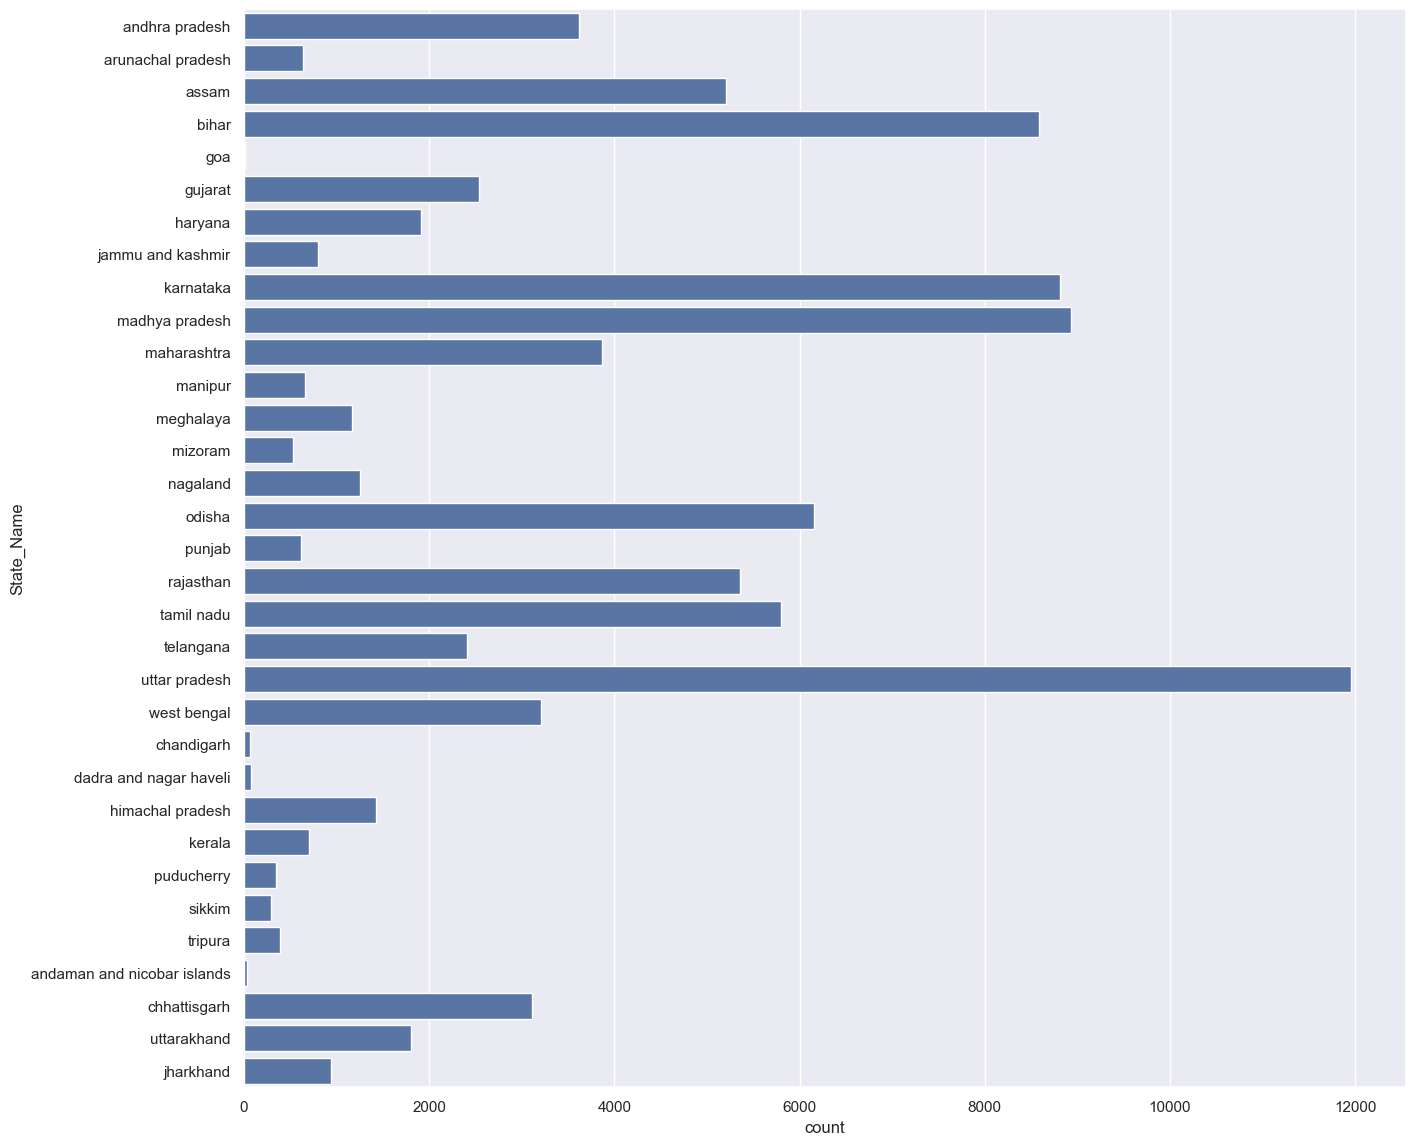

In [22]:
plt.figure(figsize=(15,14))
sns.countplot(y=crop_df['State_Name'])
plt.show()

In [23]:
crop_df.head(1)

,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671


#### Yield per Hectare per State

In [24]:
yield_per_state = crop_df.groupby('State_Name')['Yield_ton_per_hec'].sum().reset_index()


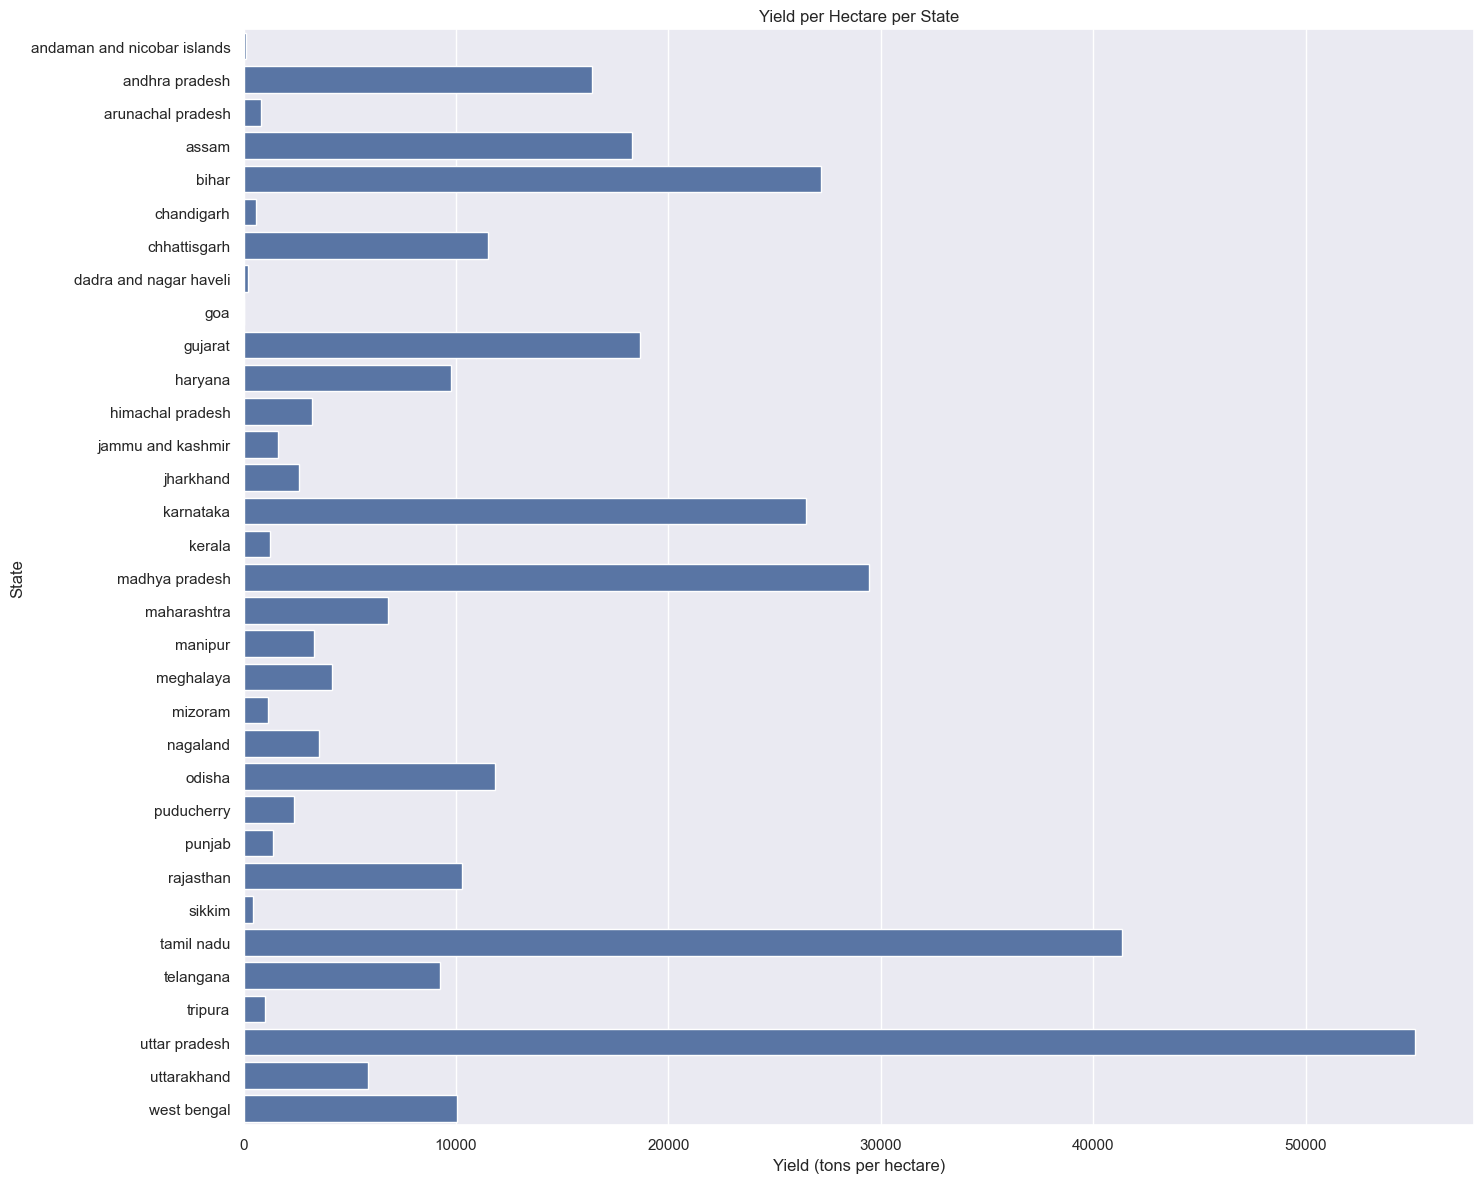

In [25]:
# Visualize yield per hectare per state
plt.figure(figsize=(15, 12))
sns.barplot(y='State_Name', x='Yield_ton_per_hec', data=yield_per_state)
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Yield (tons per hectare)')
plt.ylabel('State')
plt.title('Yield per Hectare per State')
plt.tight_layout()
plt.show()

### Crop counts

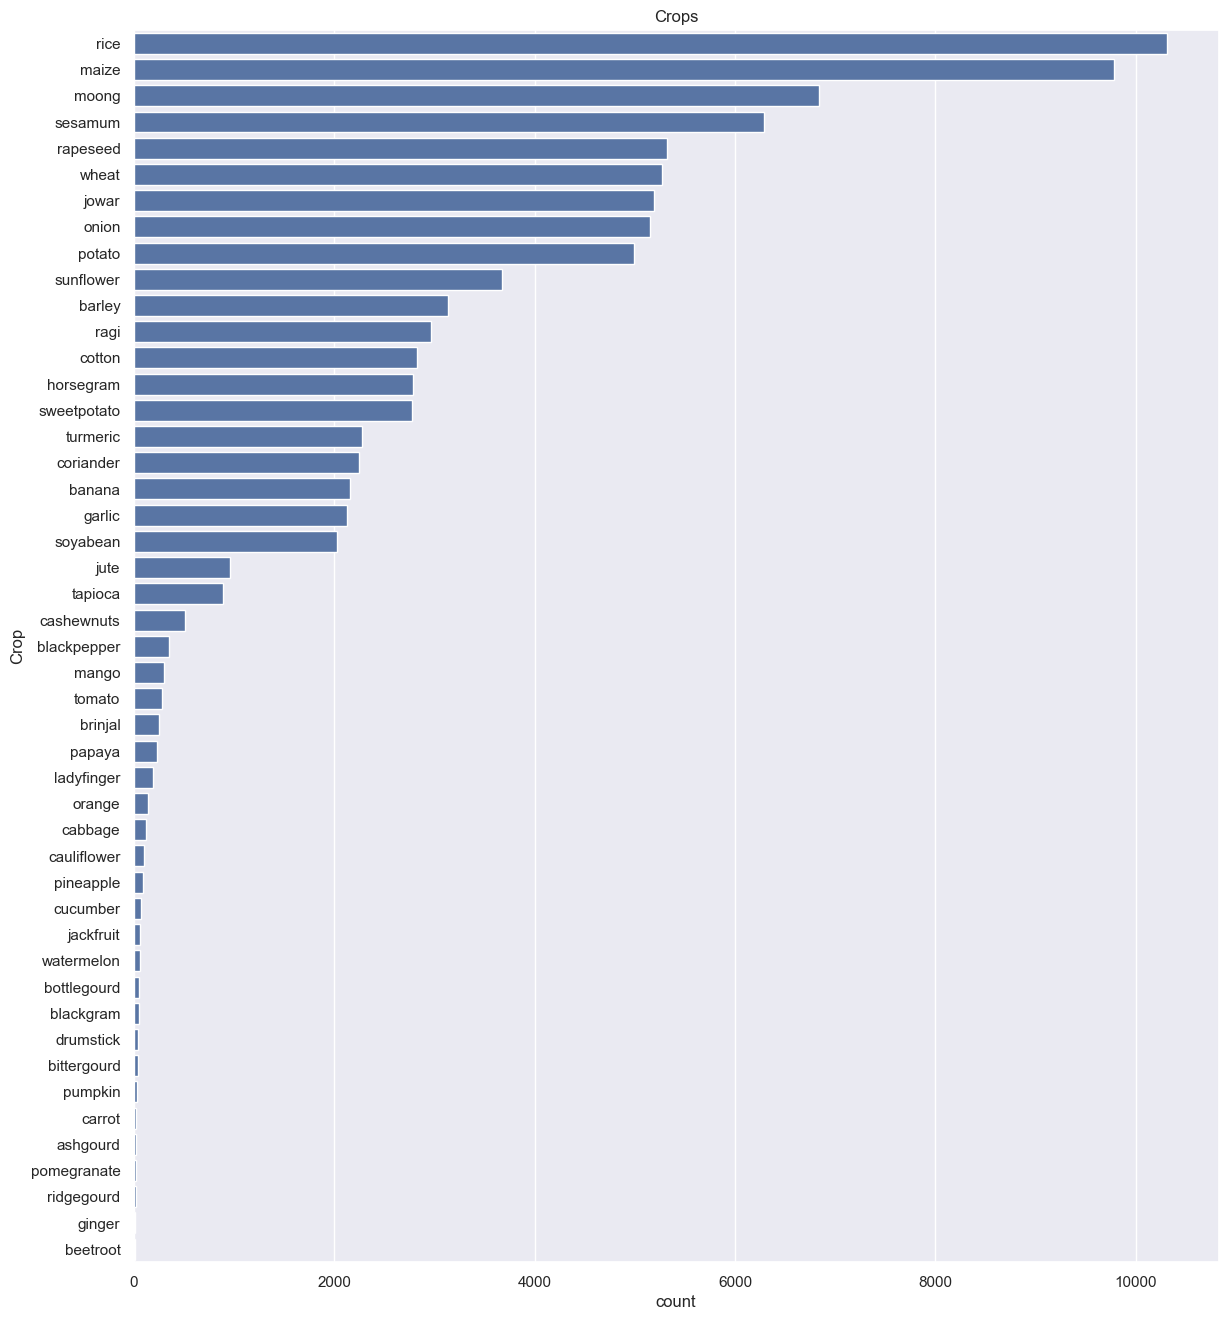

In [26]:
crop_counts = crop_df['Crop'].value_counts()

# Get the order of crops sorted by their counts
crop_order = crop_counts.index

# Create the count plot
plt.figure(figsize=(14, 16))
sns.countplot(y=crop_df['Crop'], order=crop_order)
plt.title('Crops')
plt.show()


### Total Yield per Hectare for Different Crop Types

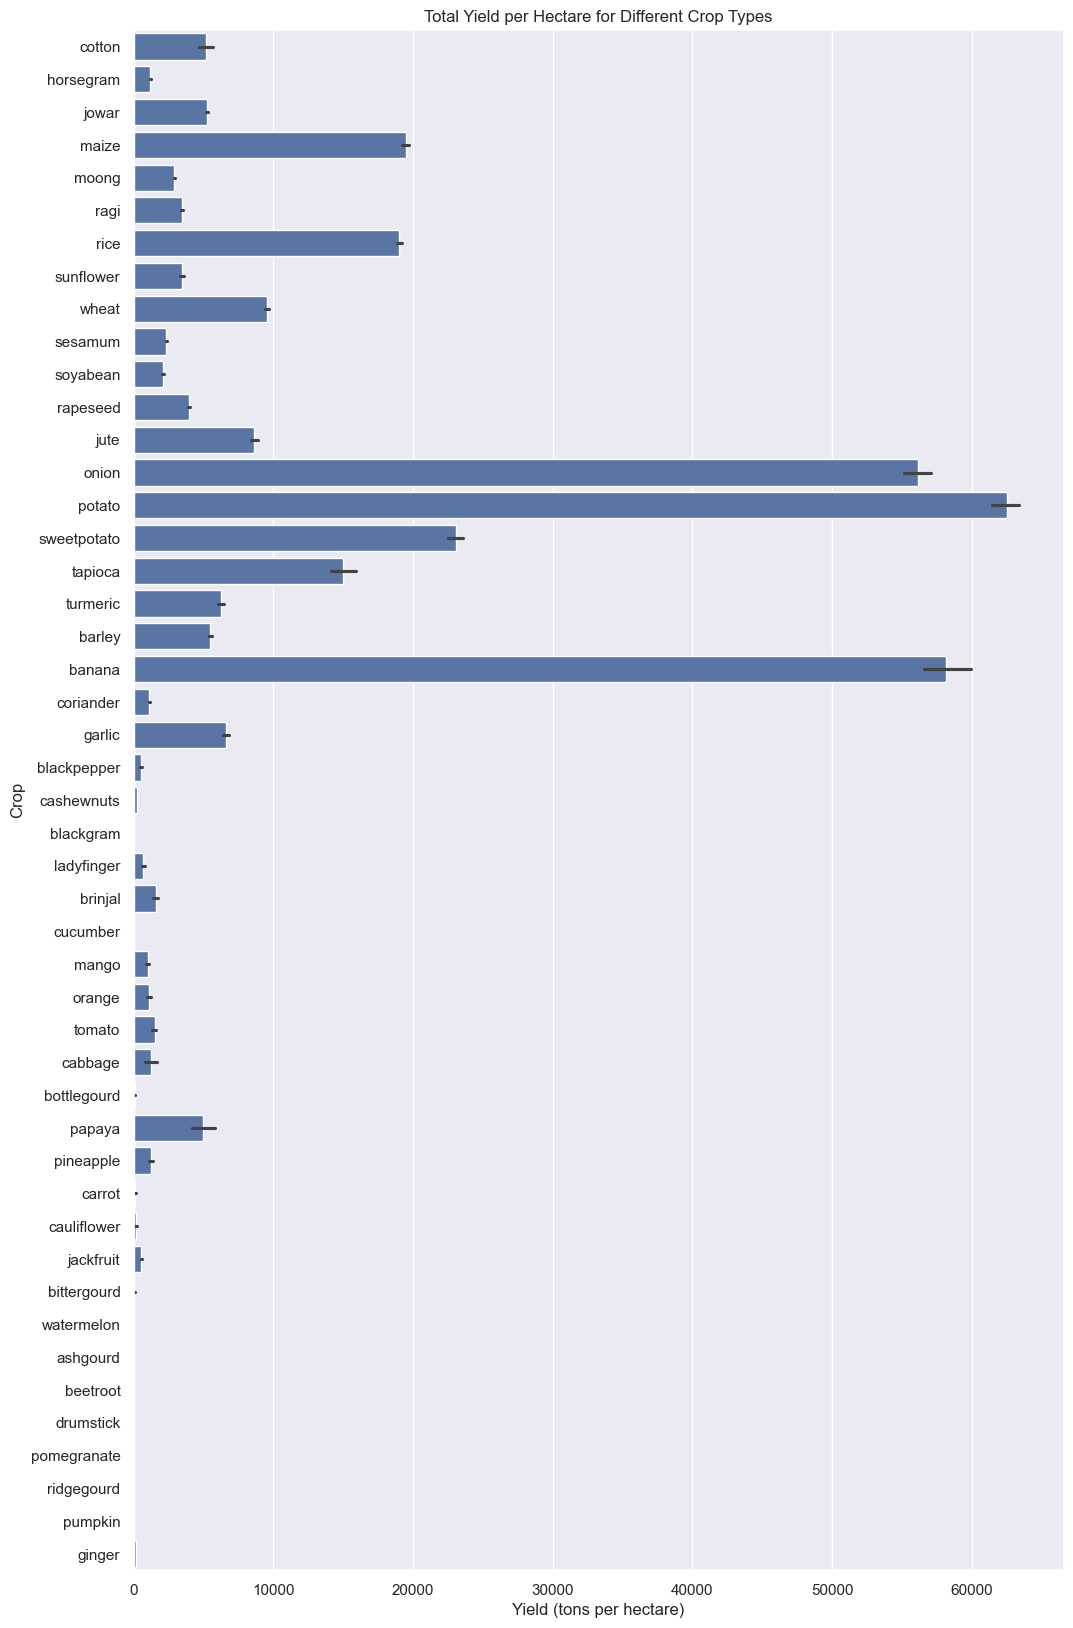

In [27]:
# Create the bar plot
plt.figure(figsize=(12, 20))
sns.barplot(x='Yield_ton_per_hec', y='Crop', data=crop_df, estimator=sum)
plt.xlabel('Yield (tons per hectare)')
plt.ylabel('Crop')
plt.title('Total Yield per Hectare for Different Crop Types')
plt.show()

## One hot encoding 

In [28]:
# Perform one-hot encoding on the categorical columns
encoded_df = pd.get_dummies(crop_df, columns=['State_Name', 'Crop_Type', 'Crop'])

# Display the first few rows of the encoded DataFrame
print(encoded_df.head())

     N   P   K    pH  rainfall  temperature  Area_in_hectares  \
0  120  40  20  5.46    654.34    29.266667            7300.0   
1   20  60  20  6.18    654.34    29.266667            3300.0   
2   80  40  40  5.42    654.34    29.266667           10100.0   
3   80  40  20  5.62    654.34    29.266667            2800.0   
4   20  40  20  5.68    654.34    29.266667            1300.0   

   Production_in_tons  Yield_ton_per_hec  \
0              9400.0           1.287671   
1              1000.0           0.303030   
2             10200.0           1.009901   
3              4900.0           1.750000   
4               500.0           0.384615   

   State_Name_andaman and nicobar islands  ...  Crop_ridgegourd  Crop_sesamum  \
0                                   False  ...            False         False   
1                                   False  ...            False         False   
2                                   False  ...            False         False   
3                   

In [29]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93201 entries, 0 to 99848
Data columns (total 93 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   N                                       93201 non-null  int64  
 1   P                                       93201 non-null  int64  
 2   K                                       93201 non-null  int64  
 3   pH                                      93201 non-null  float64
 4   rainfall                                93201 non-null  float64
 5   temperature                             93201 non-null  float64
 6   Area_in_hectares                        93201 non-null  float64
 7   Production_in_tons                      93201 non-null  float64
 8   Yield_ton_per_hec                       93201 non-null  float64
 9   State_Name_andaman and nicobar islands  93201 non-null  bool   
 10  State_Name_andhra pradesh               93201 non-null  bool   

In [30]:
encoded_df.head()

,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,State_Name_andaman and nicobar islands,...,Crop_ridgegourd,Crop_sesamum,Crop_soyabean,Crop_sunflower,Crop_sweetpotato,Crop_tapioca,Crop_tomato,Crop_turmeric,Crop_watermelon,Crop_wheat
0,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671,False,...,False,False,False,False,False,False,False,False,False,False
1,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030,False,...,False,False,False,False,False,False,False,False,False,False
2,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901,False,...,False,False,False,False,False,False,False,False,False,False
3,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000,False,...,False,False,False,False,False,False,False,False,False,False
4,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
crop_df.head()

,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615


### train test split & Scale the features


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Define the features (X) and target (y)
X = encoded_df.drop(columns=['Yield_ton_per_hec' ])
y = encoded_df['Yield_ton_per_hec']

In [33]:
X.head()

,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,State_Name_andaman and nicobar islands,State_Name_andhra pradesh,...,Crop_ridgegourd,Crop_sesamum,Crop_soyabean,Crop_sunflower,Crop_sweetpotato,Crop_tapioca,Crop_tomato,Crop_turmeric,Crop_watermelon,Crop_wheat
0,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,False,True,...,False,False,False,False,False,False,False,False,False,False
1,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,False,True,...,False,False,False,False,False,False,False,False,False,False
2,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,False,True,...,False,False,False,False,False,False,False,False,False,False
3,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,False,True,...,False,False,False,False,False,False,False,False,False,False
4,20,40,20,5.68,654.34,29.266667,1300.0,500.0,False,True,...,False,False,False,False,False,False,False,False,False,False


In [34]:
y.head(1)

0    1.287671
Name: Yield_ton_per_hec, dtype: float64

In [35]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
X_train.shape

(74560, 92)

In [37]:
X_test.shape

(18641, 92)

In [38]:
X_train

array([[-0.22736848, -0.75962105, -0.39825168, ..., -0.157867  ,
        -0.02538093,  4.0790915 ],
       [-1.23595613, -0.08449088, -0.79013577, ..., -0.157867  ,
        -0.02538093, -0.24515263],
       [ 1.28551301, -0.08449088, -0.79013577, ..., -0.157867  ,
        -0.02538093, -0.24515263],
       ...,
       [ 0.27692535, -0.08449088, -0.00636759, ..., -0.157867  ,
        -0.02538093, -0.24515263],
       [ 2.7983945 ,  1.26576947,  1.95305286, ..., -0.157867  ,
        -0.02538093, -0.24515263],
       [ 1.28551301,  1.26576947,  0.97334264, ..., -0.157867  ,
        -0.02538093, -0.24515263]])

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Support Vector Machine

In [45]:
# from sklearn.svm import SVR  # Import SVM

# # Support Vector Machine (SVM)
# svm_model = SVR(kernel='rbf')  # You can choose different kernels like 'linear', 'poly', etc.
# svm_model.fit(X_train, y_train)
# svm_predictions = svm_model.predict(X_test)

# Artificial Neural Network

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from flask import Flask, request, jsonify
import joblib


In [47]:
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1))

/Users/rajdeepthaosen/crp/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
ann_model.compile(optimizer='adam', loss='mean_squared_error')
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

ann_predictions = ann_model.predict(X_test)

Epoch 1/100
1864/1864 ━━━━━━━━━━━━━━━━━━━━ 1s 270us/step - loss: 20.4764 - val_loss: 6.8433
Epoch 2/100
1864/1864 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 8.3865 - val_loss: 6.2554
Epoch 3/100
1864/1864 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 7.2301 - val_loss: 5.1867
Epoch 4/100
1864/1864 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 6.8895 - val_loss: 5.3036
Epoch 5/100
1864/1864 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 6.5674 - val_loss: 5.9103
Epoch 6/100
1864/1864 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 6.8307 - val_loss: 5.3119
Epoch 7/100
1864/1864 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 6.5837 - val_loss: 4.8897
Epoch 8/100
1864/1864 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 6.2994 - val_loss: 4.6553
Epoch 9/100
1864/1864 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 6.4342 - val_loss: 4.5543
Epoch 10/100
1864/1864 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 5.4458 - val_loss: 4.7166
Epoch 11/100
1864/1864 ━━━━━━━━━━━━━━━━━━━━ 1s 266us/step - loss: 6.0372 - val_loss: 4.7

# Long Short-Term Memory (LSTM) Networks


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2)

lstm_predictions = lstm_model.predict(X_test_lstm)


Epoch 1/100


/Users/rajdeepthaosen/crp/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1864/1864 ━━━━━━━━━━━━━━━━━━━━ 2s 663us/step - loss: 24.4464 - val_loss: 6.8062
Epoch 2/100
1864/1864 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - loss: 10.2948 - val_loss: 5.5374
Epoch 3/100
1864/1864 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - loss: 7.9654 - val_loss: 5.1671
Epoch 4/100
1864/1864 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - loss: 7.0311 - val_loss: 5.0497
Epoch 5/100
1864/1864 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - loss: 7.4445 - val_loss: 5.4717
Epoch 6/100
1864/1864 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - loss: 6.4906 - val_loss: 5.0007
Epoch 7/100
1864/1864 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - loss: 6.6406 - val_loss: 4.7497
Epoch 8/100
1864/1864 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - loss: 6.4144 - val_loss: 4.8904
Epoch 9/100
1864/1864 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - loss: 5.5817 - val_loss: 4.9196
Epoch 10/100
1864/1864 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - loss: 6.2296 - val_loss: 5.0196
Epoch 11/100
1864/1864 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - loss: 5.8760 - val_loss: 4.6358
Epoch 1

# Evaluate models

In [51]:

def evaluate_model(name, predictions):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{name} - MAE: {mae}, MSE: {mse}, R2: {r2}")

evaluate_model("Random Forest", rf_predictions)
evaluate_model("Decision Tree", dt_predictions)
evaluate_model("Linear Regression", lr_predictions)
# evaluate_model("Support Vector Machine", svm_predictions)
evaluate_model("ANN", ann_predictions)
evaluate_model("LSTM", lstm_predictions)


Random Forest - MAE: 0.26753269062627283, MSE: 2.115813642964108, R2: 0.9570756869284041
Decision Tree - MAE: 0.3386428467350818, MSE: 2.607604266811489, R2: 0.9470985441994597
Linear Regression - MAE: 2.067119578602892, MSE: 18.481338100835732, R2: 0.6250620912383706
ANN - MAE: 0.6636052626882484, MSE: 5.0599802584182365, R2: 0.8973462632350916
LSTM - MAE: 0.6045934428773336, MSE: 4.385326614988577, R2: 0.9110332173303956


The performance metrics provide insights into the efficacy of various machine learning models applied to a given task. In this case:

- **Random Forest** and **Decision Tree** models exhibit high accuracy, with low MAE and MSE, and high R-squared values, indicating robust predictive power.
- **Linear Regression** model shows relatively high MAE and MSE compared to tree-based models, suggesting it might not capture complex relationships well, despite a moderate R-squared value.
- **Support Vector Machine** performs moderately, with lower accuracy compared to tree-based models but better than linear regression.
- **Artificial Neural Network (ANN)** and **Long Short-Term Memory (LSTM)** models show competitive performance, with lower MAE and MSE similar to tree-based models and high R-squared values, indicating strong predictive capabilities, especially in capturing non-linear patterns.

In summary, tree-based models, ANN, and LSTM outperform linear regression and SVM in this task, highlighting the importance of considering model complexity and non-linear relationships in predictive modeling.

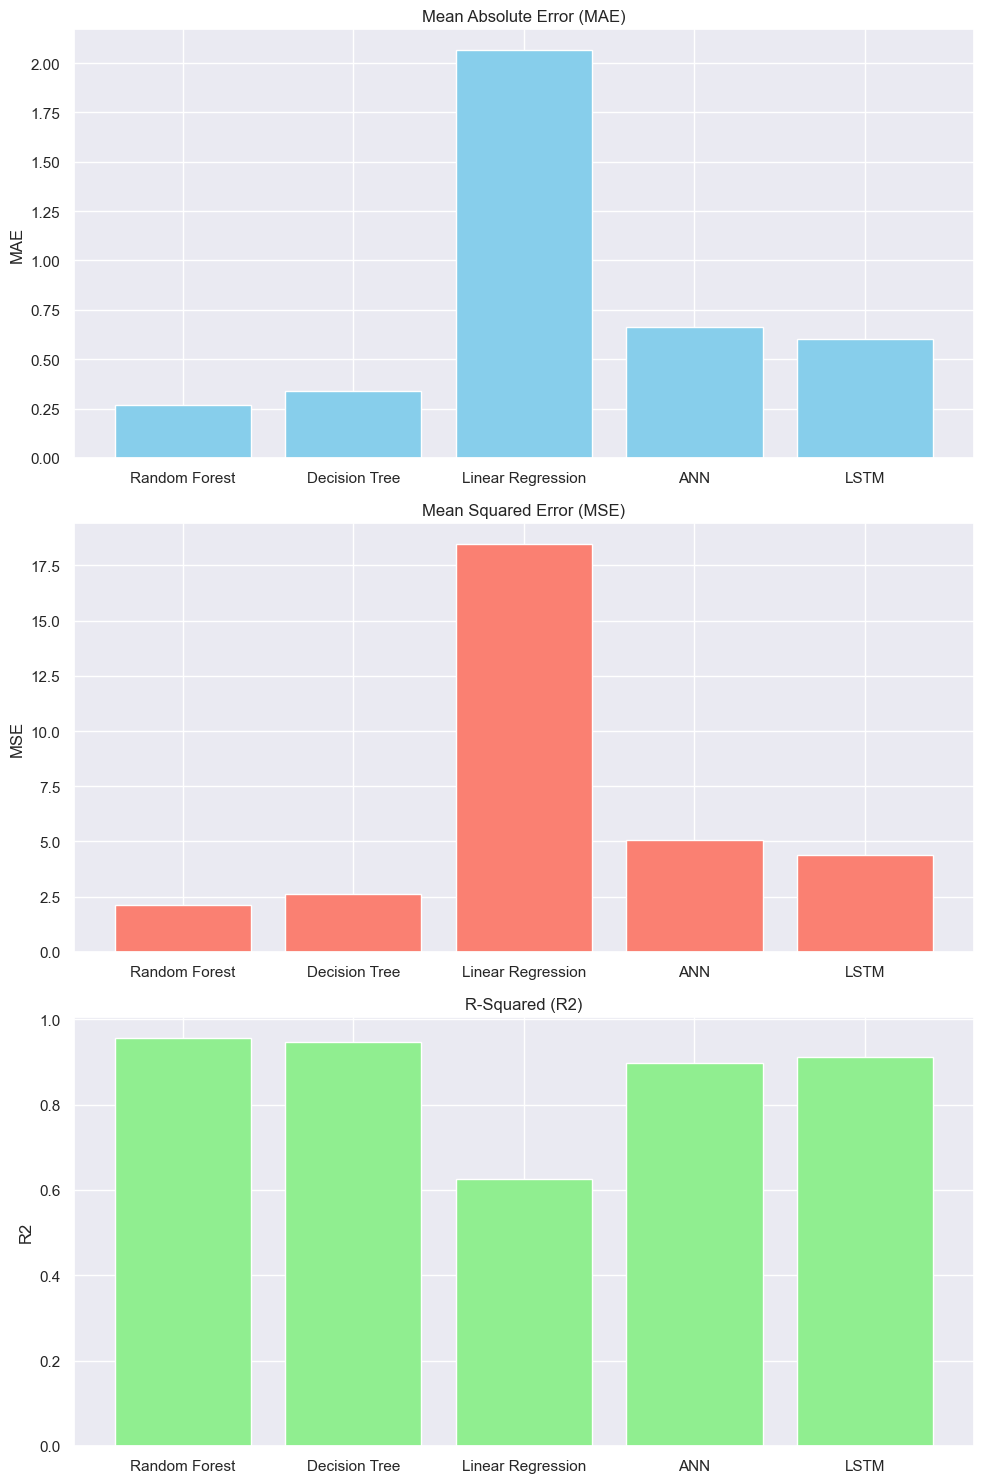

In [55]:

models = ['Random Forest', 'Decision Tree', 'Linear Regression', 'ANN', 'LSTM']
MAE = [0.26753269062627283, 0.3386428467350818, 2.067119578602892, 0.6636052626882484, 0.6045934428773336]
MSE = [2.115813642964108, 2.607604266811489, 18.481338100835732, 5.0599802584182365, 4.385326614988577]
R2 = [0.9570756869284041, 0.9470985441994597, 0.6250620912383706, 0.8973462632350916, 0.9110332173303956]

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot MAE
axs[0].bar(models, MAE, color='skyblue')
axs[0].set_title('Mean Absolute Error (MAE)')
axs[0].set_ylabel('MAE')

# Plot MSE
axs[1].bar(models, MSE, color='salmon')
axs[1].set_title('Mean Squared Error (MSE)')
axs[1].set_ylabel('MSE')

# Plot R2
axs[2].bar(models, R2, color='lightgreen')
axs[2].set_title('R-Squared (R2)')
axs[2].set_ylabel('R2')

plt.tight_layout()
plt.show()


In [57]:
crop_df.head(1)

,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671


In [56]:
# Save the model and the scaler
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
# def predict_yield(input_data):
#     """
#     Predicts crop yield using the Random Forest model.

#     Parameters:
#     input_data (dict): A dictionary containing the input data for prediction.

#     Returns:
#     float: The predicted crop yield.
#     """
#     # Load the model and scaler
#     rf_model = joblib.load('rf_model.pkl')
#     scaler = joblib.load('scaler.pkl')

#     # Convert input data to DataFrame
#     input_df = pd.DataFrame([input_data])

#     # Scale the input data
#     input_scaled = scaler.transform(input_df)

#     # Predict yield
#     yield_prediction = rf_model.predict(input_scaled)

#     return yield_prediction[0]

# # Example usage
# input_data = {
#     'N': 80,
#     'P': 40,
#     'K': 20,
#     'pH': 5.62,
#     'rainfall': 654.34,
#     'temperature': 29.27,
#     'Area_in_hectares': 2800.0,
#     'Year': 2023,
#     'Month': 6
# }

# predicted_yield = predict_yield(input_data)
# print(f"Predicted Yield: {predicted_yield} tons per hectare")


In [58]:
def predict_yield(input_data):
    """
    Predicts crop yield using the Random Forest model.

    Parameters:
    input_data (dict): A dictionary containing the input data for prediction.

    Returns:
    float: The predicted crop yield.
    """
    # Load the model and scaler
    rf_model = joblib.load('rf_model.pkl')
    scaler = joblib.load('scaler.pkl')

    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Ensure columns are in the same order as training
    feature_columns = ['N', 'P', 'K', 'pH', 'rainfall', 'temperature', 'Area_in_hectares', 'Production_in_tons']
    input_df = input_df[feature_columns]

    # Scale the input data
    input_scaled = scaler.transform(input_df)

    # Predict yield
    yield_prediction = rf_model.predict(input_scaled)

    return yield_prediction[0]

# Example usage
input_data = {
    'N': 120,
    'P': 40,
    'K': 20,
    'pH': 5.46,
    'rainfall': 654.34,
    'temperature': 29.266667,
    'Area_in_hectares': 7300.0,
    'Production_in_tons': 9400.0
}

predicted_yield = predict_yield(input_data)
print(f"Predicted Yield: {predicted_yield} tons per hectare")


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Crop_Type_kharif
- Crop_Type_rabi
- Crop_Type_summer
- Crop_Type_whole year
- Crop_ashgourd
- ...


In [59]:
y_test.shape

(18641,)

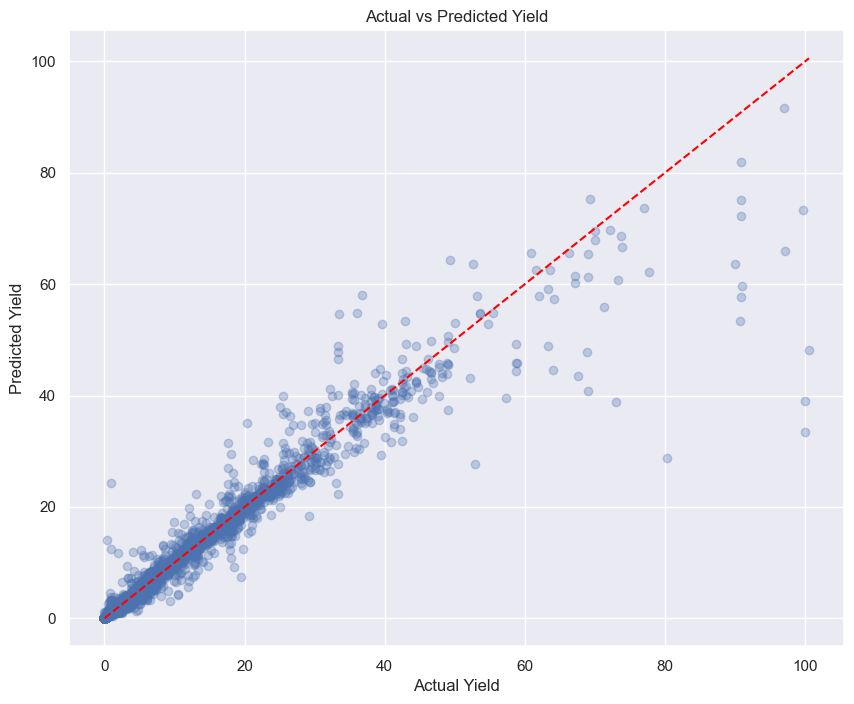

In [62]:
# Load the trained model and scaler
rf_model = joblib.load('rf_model.pkl')
scaler = joblib.load('scaler.pkl')

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.show()


In [64]:
crop_df.describe()

,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
count,93201.000000,93201.000000,93201.000000,93201.000000,93201.000000,93201.000000,93201.000000,93201.000000,93201.000000
mean,69.075117,41.290222,40.145170,5.640499,656.210239,26.760580,10528.476780,21135.659225,3.606880
std,39.773625,14.822393,25.475539,0.499701,526.095963,4.789031,23766.437046,53289.988886,6.918264
min,10.000000,10.000000,10.000000,3.820000,3.274569,1.180000,0.580000,0.000000,0.000000
25%,50.000000,40.000000,20.000000,5.360000,157.310000,23.106000,119.000000,146.000000,0.573705
50%,70.000000,40.000000,30.000000,5.540000,579.750000,27.333333,881.000000,1309.000000,1.292572
75%,80.000000,60.000000,45.000000,5.920000,1037.320000,29.266667,6549.000000,11390.000000,2.857507
max,180.000000,75.000000,120.000000,7.000000,2459.640000,35.346667,147261.000000,404377.000000,103.000000


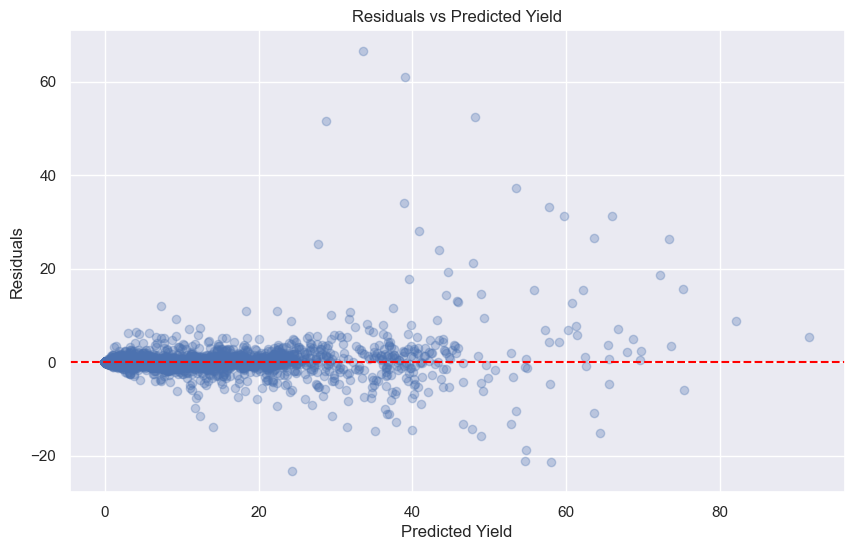

In [65]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Yield')
plt.show()


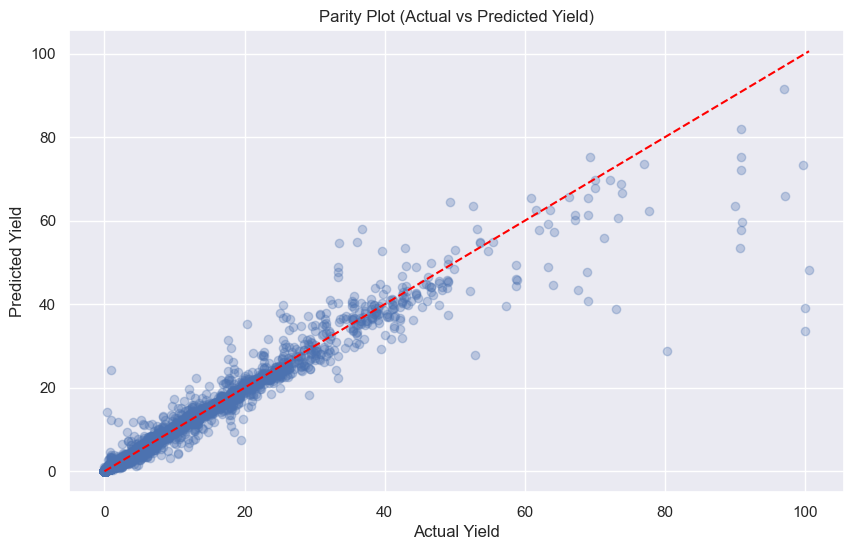

In [66]:
# Parity plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Parity Plot (Actual vs Predicted Yield)')
plt.show()


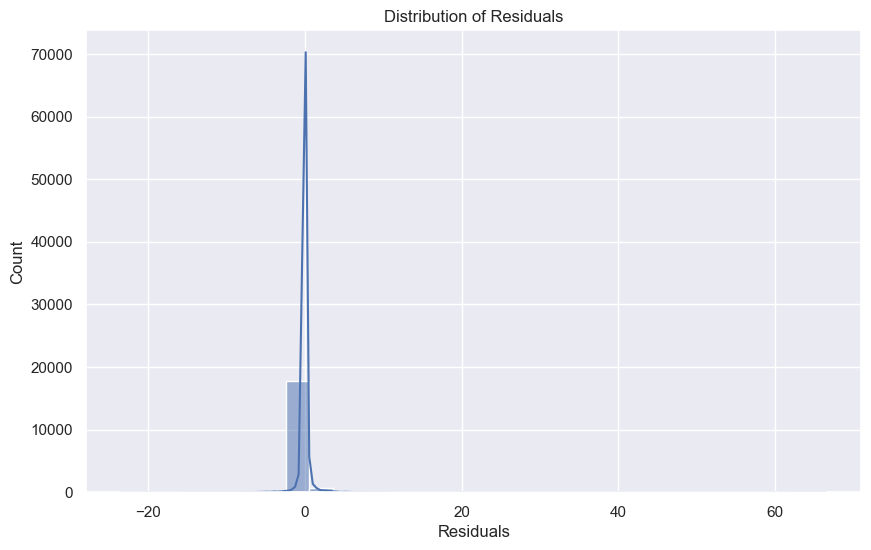

In [67]:
import seaborn as sns

# Plot distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()
